In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
import pandas
from pyndamics import *
from pyndamics.emcee import *

In [15]:
data=pandas.read_excel('data/guinea.xlsx')
data

,Days,Cases,Deaths
0,659,3804,2536
1,652,3804,2536
2,645,3804,2536
3,638,3807,2536
4,631,3804,2536
5,624,3804,2536
6,617,3804,2536
7,610,3804,2536
8,603,3805,2536
9,596,3810,2536


In [16]:
t_data=data['Days']
X_data=data['Deaths']
C_data=data['Cases']

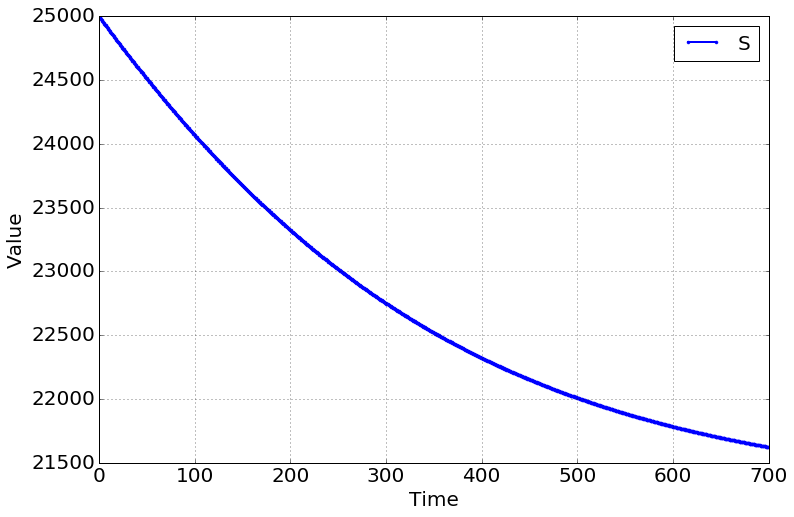

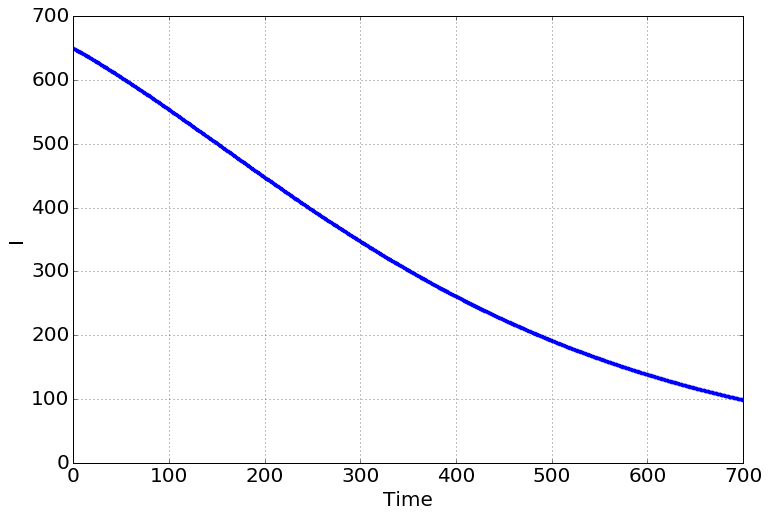

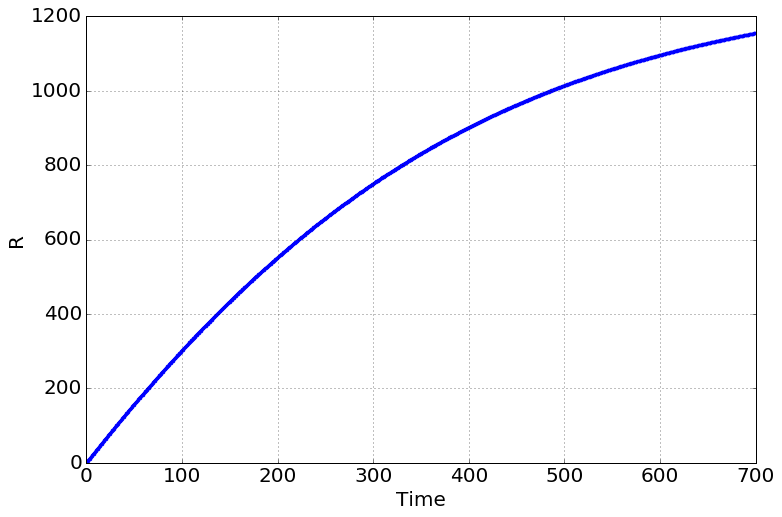

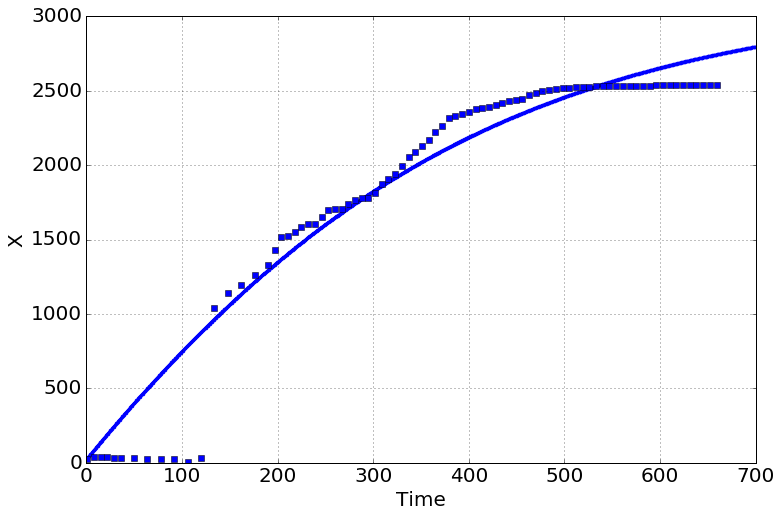

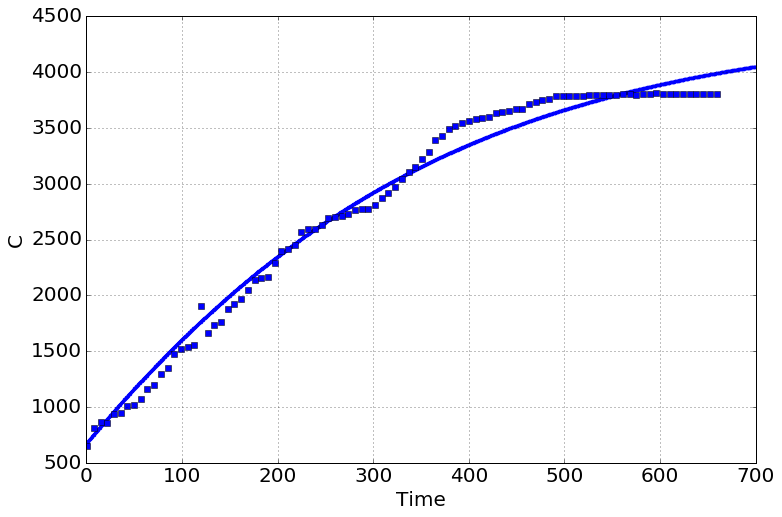

In [17]:
sim=Simulation()
sim.add("S'=-beta*S*I",25000,plot=True)
sim.add("I'=beta*S*I-zeta*I-alpha*I",650,plot=True)
sim.add("R'=zeta*I",0,plot=True)
sim.add("X'=alpha*I",24,plot=True)
sim.add("C=I+R+X",plot=True)
sim.params(beta=6.28e-7,zeta=.005,alpha=.012)
sim.add_data(t=t_data,X=X_data,plot=True)
sim.add_data(t=t_data,C=C_data,plot=True)
sim.run(0,700)

Sampling Prior...
Done.
2.86 s
Running MCMC...
Done.
10 m, 24.83 s


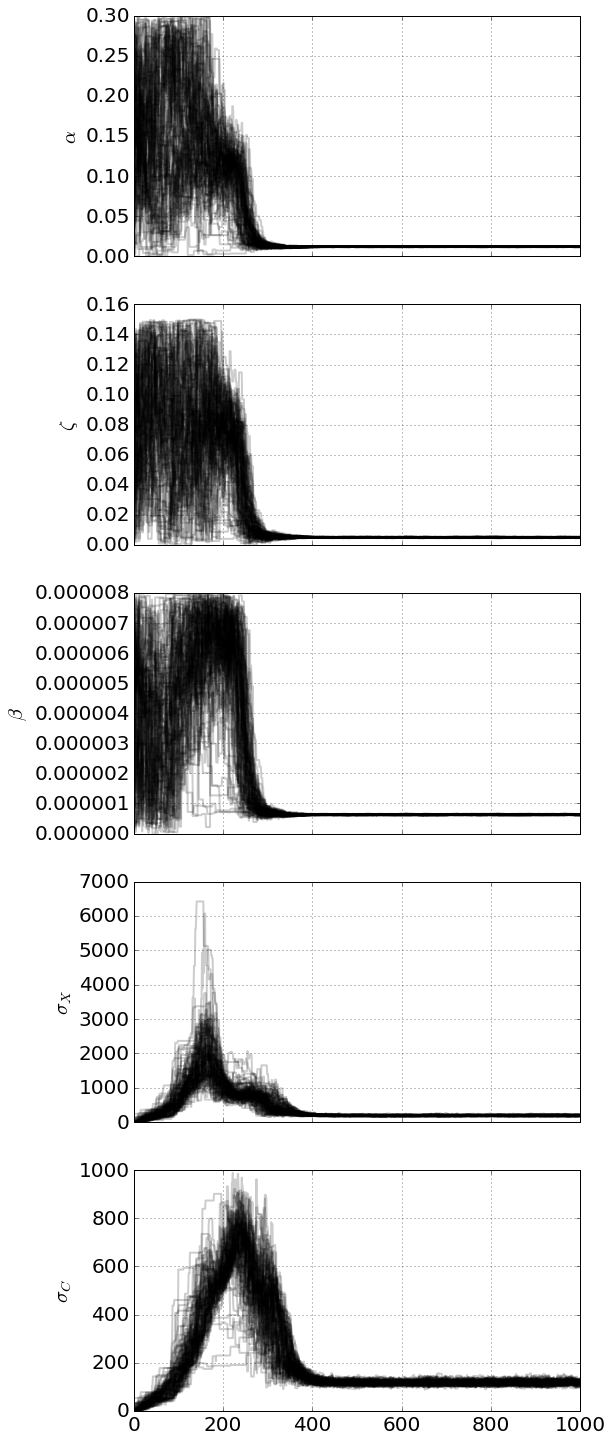

In [18]:
model=MCMCModel(sim,
                alpha=Uniform(0,.3),
                beta=Uniform(0,.000008),
                zeta=Uniform(0,.15)
                )
model.run_mcmc(1000)
model.plot_chains()

Running MCMC...
Done.
8 m, 46.71 s


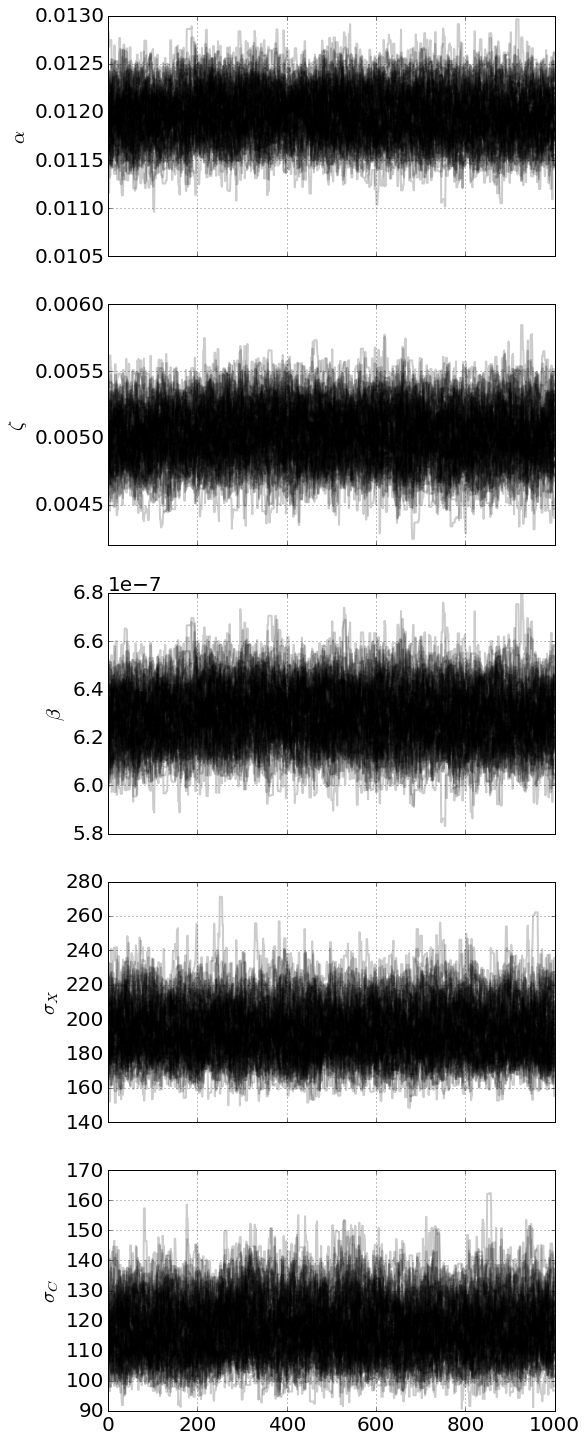

In [19]:
model.run_mcmc(1000)
model.plot_chains()

Running MCMC...
Done.
8 m, 44.13 s


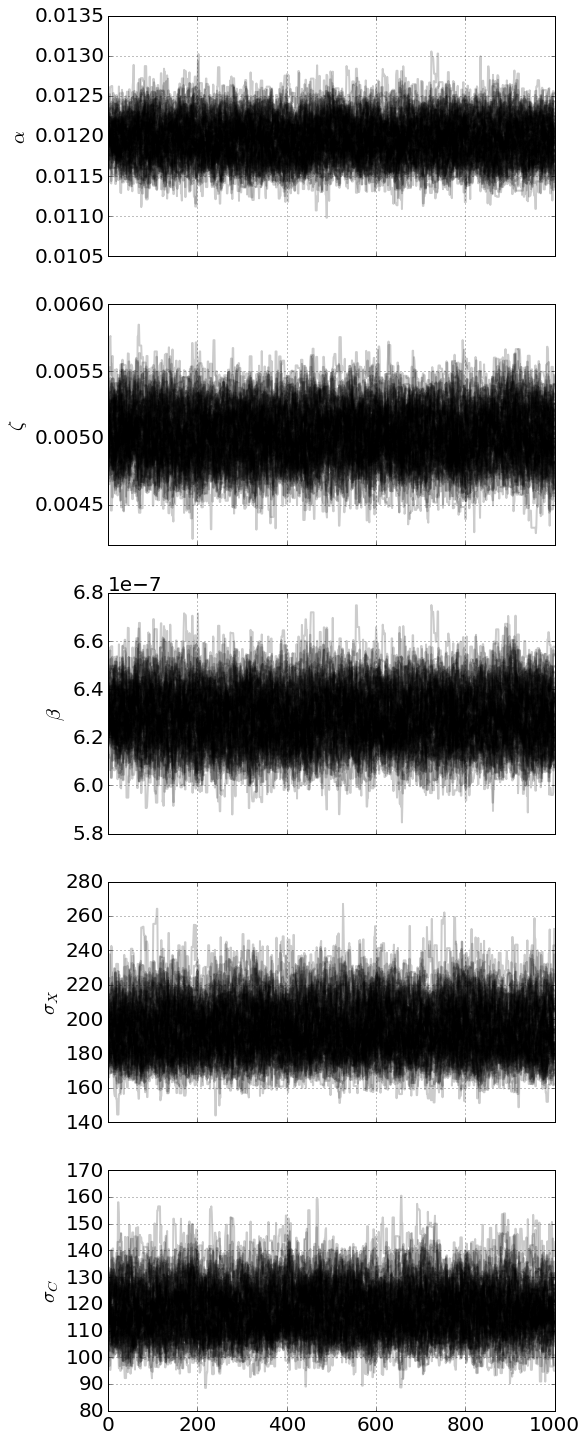

In [20]:
model.set_initial_values('samples')
model.run_mcmc(1000)
model.plot_chains()

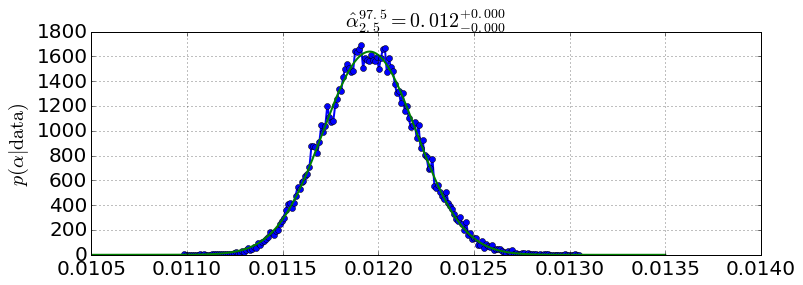

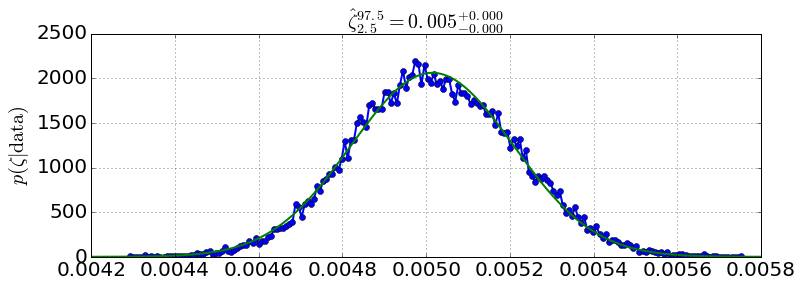

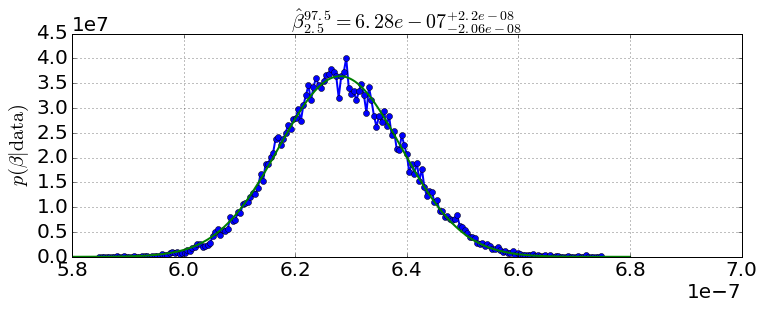

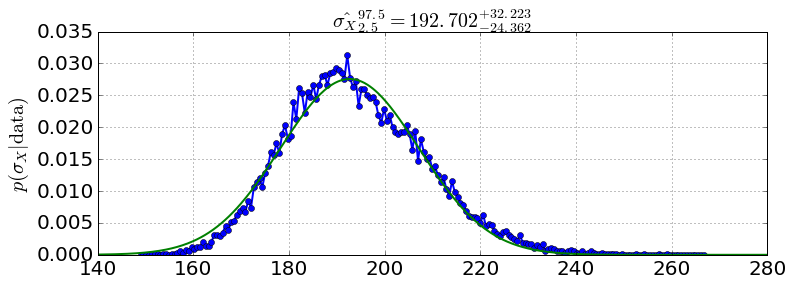

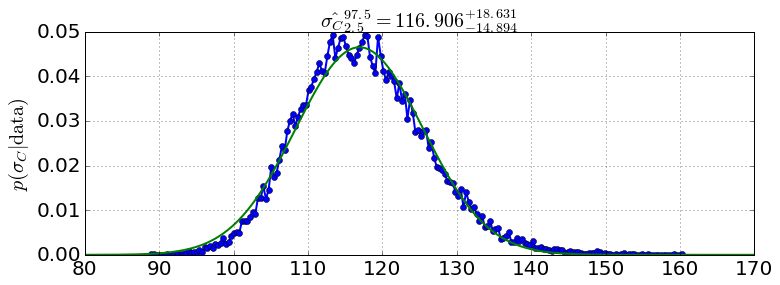

In [21]:
model.plot_distributions()

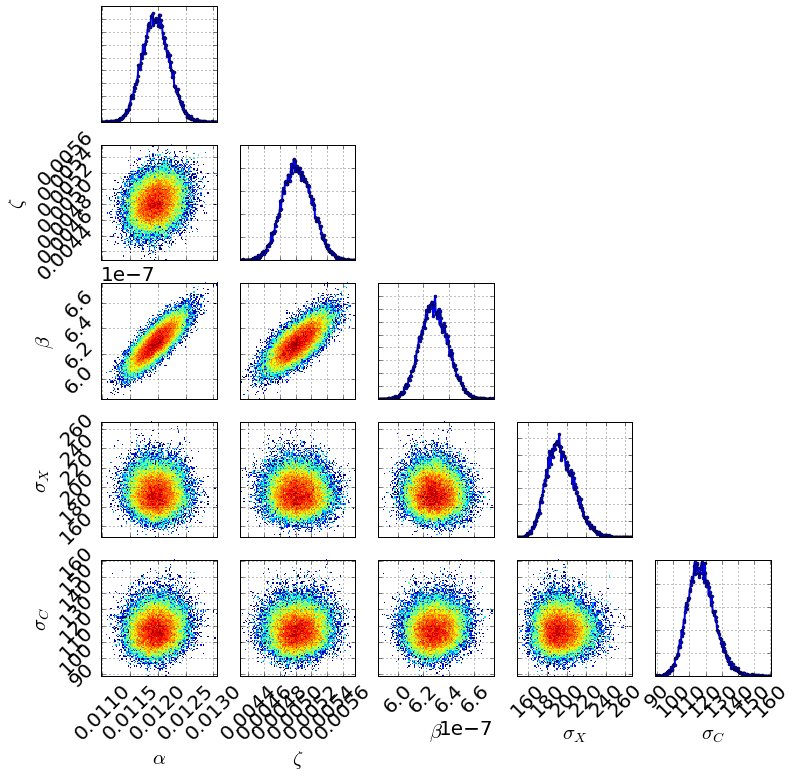

In [22]:
model.triangle_plot()

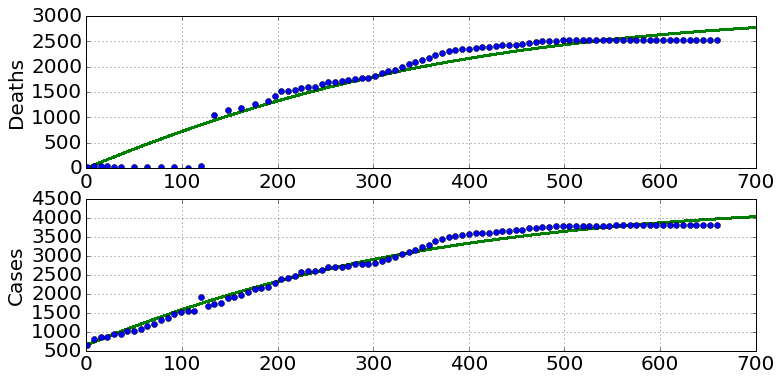

In [26]:
figure(figsize=(12,6))
sim.noplots=True  # turn off the simulation plots
for i in range(600):
    model.draw()
    sim.run(0,700)
    subplot(2,1,1)
    plot(sim.t,sim.X,'-g')
    subplot(2,1,2)
    plot(sim.t,sim.C,'-g')
sim.noplots=False  # gotta love a double-negative

subplot(2,1,1)
plot(t_data,X_data,'bo')  # plot the data
ylabel('Deaths')

subplot(2,1,2)
plot(t_data,C_data,'bo')  # plot the data
ylabel('Cases')


#### 




      

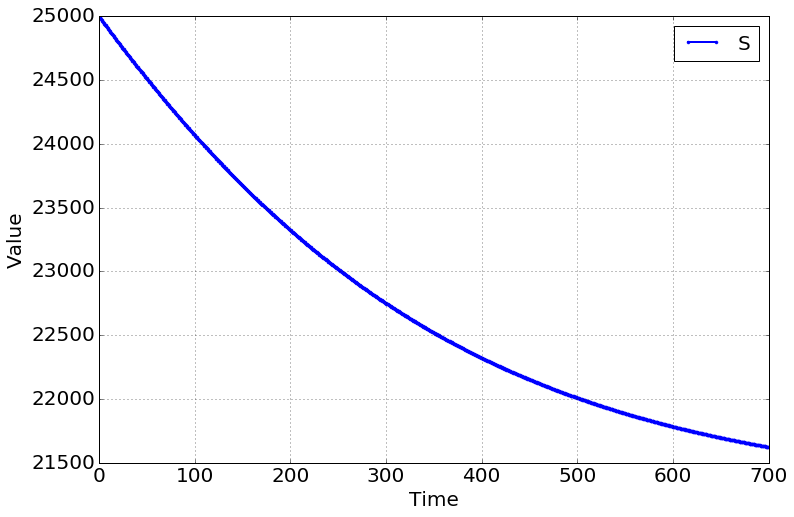

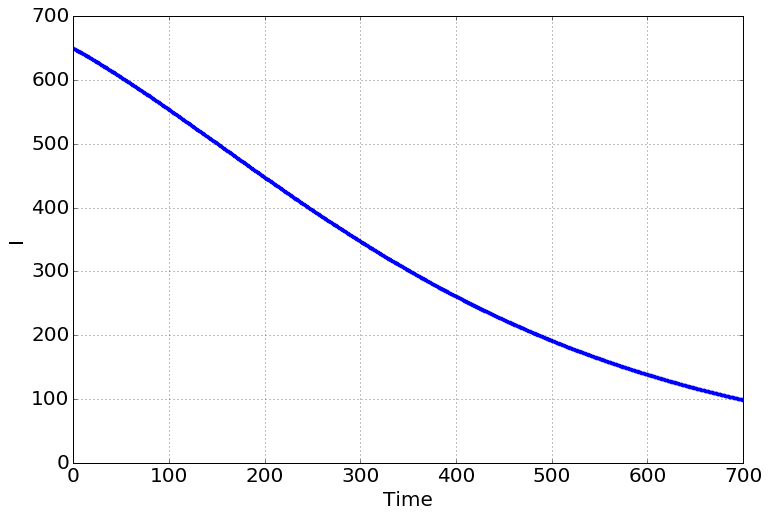

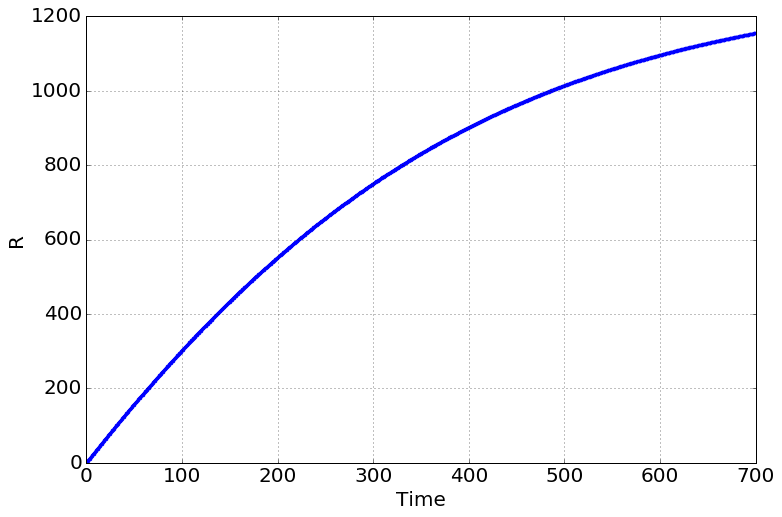

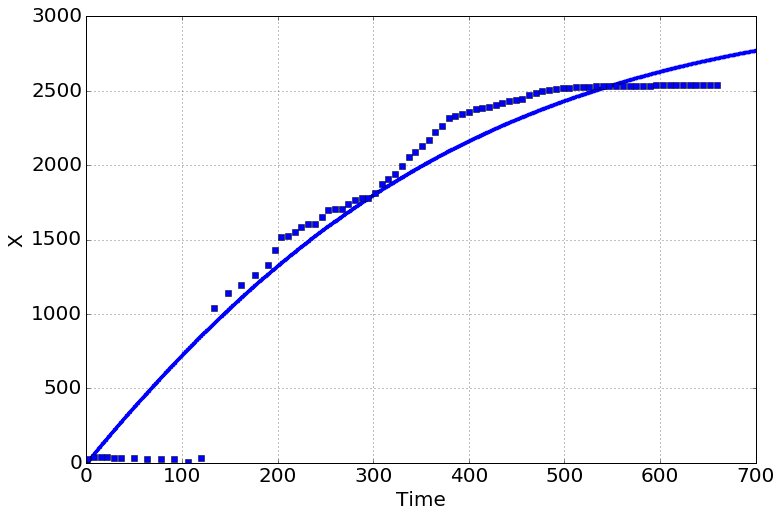

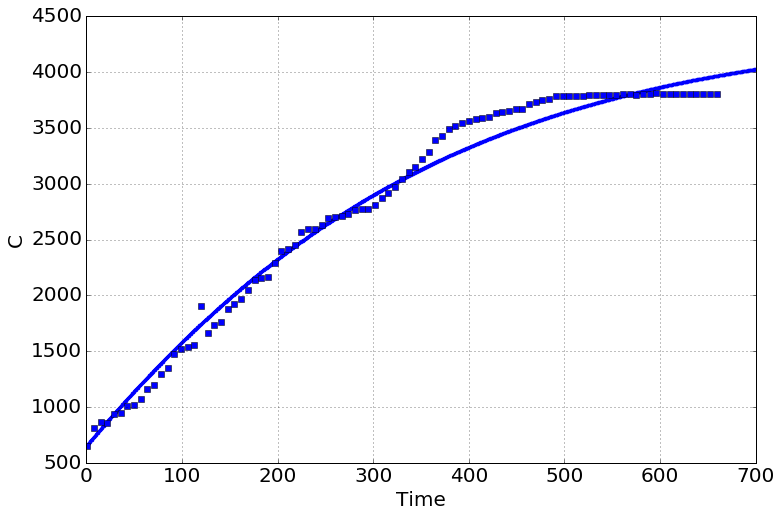

In [24]:
sim=Simulation()
sim.add("S'=-beta*S*I",25000,plot=1)
sim.add("I'=beta*S*I-zeta*I-alpha*I",650,plot=2)
sim.add("R'=zeta*I",0,plot=3)
sim.add("X'=alpha*I",0,plot=4)
sim.add("C=I+R+X",plot=5)
sim.params(beta=6.28e-7,zeta=.005,alpha=.012)
sim.add_data(t=t_data,X=X_data,plot=True)
sim.add_data(t=t_data,C=C_data,plot=True)
sim.run(0,700)

In [ ]:
f=sim.figures[1]
f.savefig('Guine_S.png')

f=sim.figures[2]
f.savefig('Guine_I.png')

f=sim.figures[3]
f.savefig('Guine_R.png')

f=sim.figures[4]
f.savefig('Guine_R.png')

f=sim.figures[2]
f.savefig('Death_R.png')
